## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 03

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    cdf = hist.cumsum()
    
    cdf_normalized = cdf * hist.max() / cdf.max()

    cdf_m = np.ma.masked_equal(cdf, 0)
    
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    
    equalized_image = cdf[image]
    
    return equalized_image, cdf

C:\Users\mihin\AppData\Local\Temp\ipykernel_33464\2488263937.py:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(), 256, [0, 256], color='gray')
C:\Users\mihin\AppData\Local\Temp\ipykernel_33464\2488263937.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_equalized.flatten(), 256, [0, 256], color='blue')


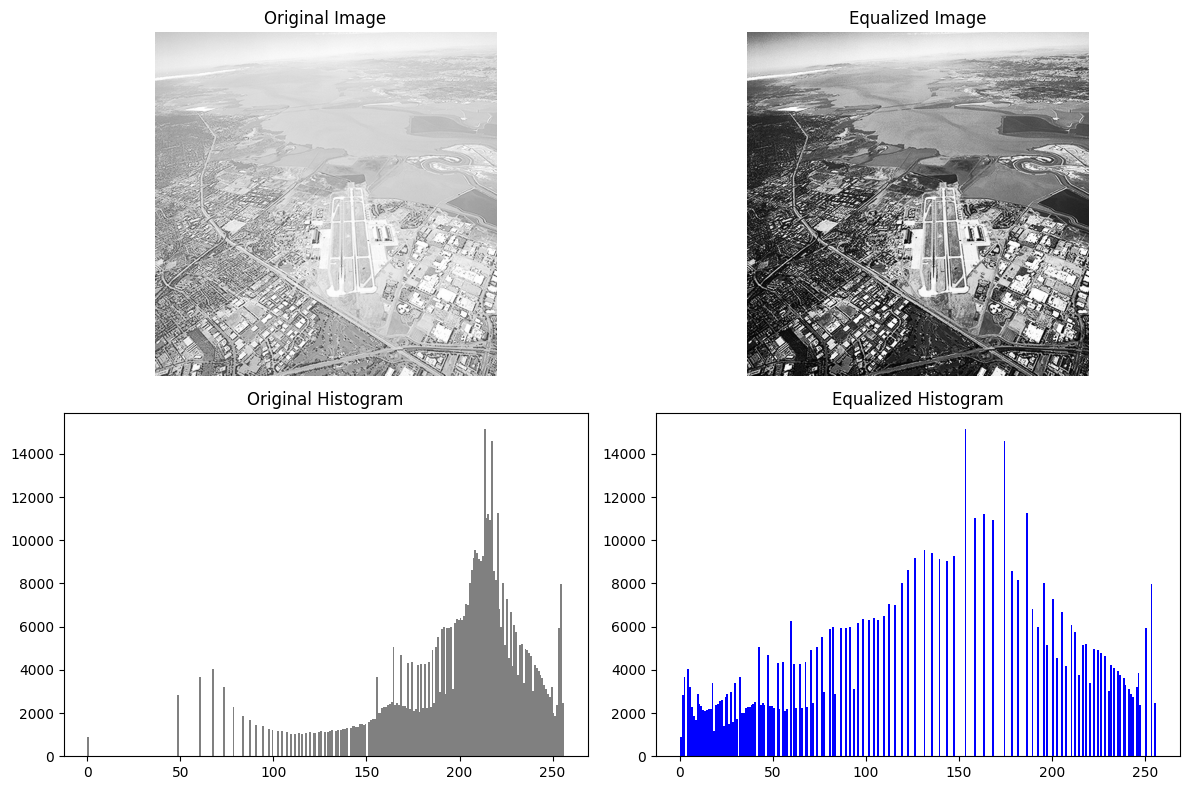

In [6]:
img_path = 'assets/runway.png'
if not os.path.exists(img_path):
    print(f"Error: File not found at {img_path}. Please check your assets folder.")
else:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    img_equalized, cdf = histogram_equalization(img)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title("Equalized Image")
    plt.imshow(img_equalized, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title("Original Histogram")
    plt.hist(img.flatten(), 256, [0, 256], color='gray')
    
    plt.subplot(2, 2, 4)
    plt.title("Equalized Histogram")
    plt.hist(img_equalized.flatten(), 256, [0, 256], color='blue')

    plt.tight_layout()
    plt.show()